<a href="https://colab.research.google.com/github/marcinwolter/DNN_examples/blob/master/mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20 #20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()



Using TensorFlow backend.


11501568/11490434 [==============================] - 2s 0us/step


W1119 08:51:23.916263 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 08:51:23.923471 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 08:51:23.930955 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 08:51:23.947705 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1119 08:51:23.958332 140547022583680 depr

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


W1119 08:51:24.043570 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1119 08:51:24.052351 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1119 08:51:24.164202 140547022583680 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1119 08:51:24.311431 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add inste

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


W1119 08:51:25.704894 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1119 08:51:25.707123 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1119 08:51:25.808952 140547022583680 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 8s 130us/step - loss: 0.2501 - acc: 0.9233 - val_loss: 0.1136 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1024 - acc: 0.9688 - val_loss: 0.0968 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0737 - acc: 0.9767 - val_loss: 0.0725 - val_acc: 0.9791
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0605 - acc: 0.9819 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0513 - acc: 0.9852 - val_loss: 0.0698 - val_acc: 0.9831
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0415 - acc: 0.9876 - val_loss: 0.0696 - val_acc: 0.9824
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0386 - acc: 0.9884 - val_loss: 0.0821 - val_acc: 0.9803
Epoch 8/20
60000/60000 [===========================

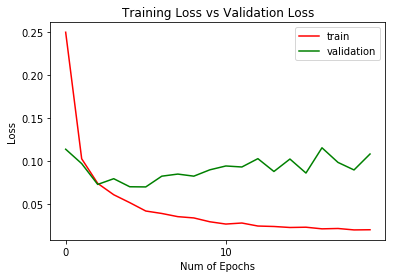

In [3]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

#plt.figure(0)
#plt.plot(history.history['categorical_accuracy'],'r')
#plt.plot(history.history['val_categorical_accuracy'],'g')
#plt.xticks(np.arange(0, n_epochs, 10.0))
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.xlabel("Num of Epochs")
#plt.ylabel("Accuracy")
#plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
#plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()



In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10802339288748392
Test accuracy: 0.9836


In [5]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 99.88% , Test: 98.36% 


[[ 971    1    2    1    0    0    1    0    3    1]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   1    0 1020    1    1    0    3    5    1    0]
 [   0    0    6  993    0    2    0    4    0    5]
 [   2    0    2    0  959    1    4    3    1   10]
 [   3    0    0    6    1  873    4    1    4    0]
 [   3    2    1    0    2    3  944    0    3    0]
 [   1    0    7    0    0    0    0 1012    4    4]
 [   2    1    7    2    2    3    1    3  950    3]
 [   1    3    0    2    5    1    0    5    3  989]]


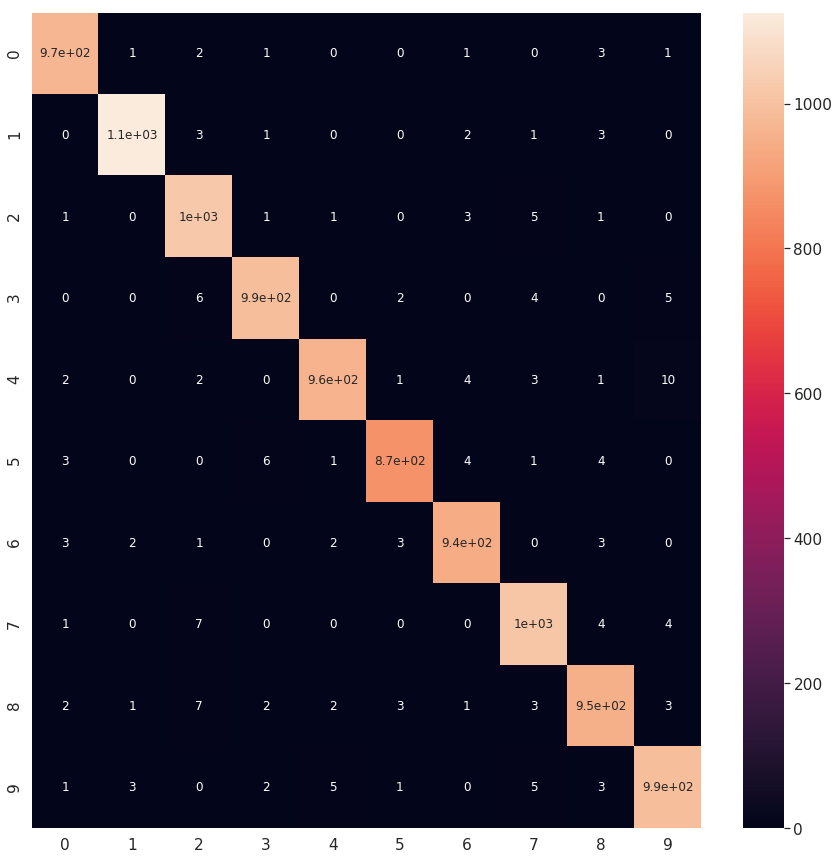

In [6]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()
